## Sci-kit Learn Titanic Classification (35 pts)

In [1]:
import pandas as pd

titanic_data = pd.DataFrame(dtype=float)

titanic_data = pd.read_csv("csv_files/titanic.csv",index_col=0)
titanic_data.drop(columns=["Name","Cabin","SibSp", "Parch","Ticket","Ticket","Fare"],inplace=True) # remove columns that are not informative

In [2]:
# drop na rows
titanic_data.dropna(axis=0,inplace=True)

In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["male","female"]) # male = 0, female = 1
titanic_data["Sex"] = le.transform(titanic_data["Sex"])

le = preprocessing.LabelEncoder()
le.fit(["C","Q","S"]) # male = 0, female = 1
titanic_data["Embarked"] = le.transform(titanic_data["Embarked"])

print(titanic_data)



             Survived  Pclass  Sex   Age  Embarked
PassengerId                                       
1                   0       3    1  22.0         2
2                   1       1    0  38.0         0
3                   1       3    0  26.0         2
4                   1       1    0  35.0         2
5                   0       3    1  35.0         2
...               ...     ...  ...   ...       ...
886                 0       3    0  39.0         1
887                 0       2    1  27.0         2
888                 1       1    0  19.0         2
890                 1       1    1  26.0         0
891                 0       3    1  32.0         1

[712 rows x 5 columns]


Now all values are numerical

In [4]:

survived_group_df = titanic_data.groupby(by="Survived")
# for col in survived_group_df.head():
#     print(survived_group_df[col].describe())


## Results for Groupby:
* As expected from my own knowledge of the titanic, the "average sex" for survived was 0.32
    * This means that 68% of the people that survived were female
* The average age for someone who survived was 28
* There does not appear to be that large of a difference between the average embarkment location for those that survived and those that did not
* For the class of the individual, it appears that those who survived had a higher average class (lower number) than those who did not survive
    * class = 1.87 for those who survived
    * class = 2.48 for those who did not survive

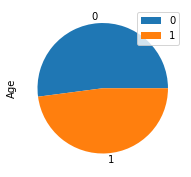

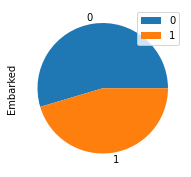

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# grouped = df.groupby('ticker')

fig, ax = plt.subplots(figsize=(7,3))
fig2, ax2 = plt.subplots(figsize=(7,3))

survived_group_df["Age"].mean().plot(kind='pie',ax=ax)
ax.legend()
survived_group_df["Embarked"].mean().plot(kind='pie',ax=ax2)
ax2.legend()



## Prediction:
* The NULL Hypothesis is that there is no correlation between either Pclass or Sex and the Survival

In [6]:
import scipy.stats as stats
# sex
alpha = 0.05
category = "Sex"
t_computed, p_value = stats.ttest_ind(pd.Series(titanic_data[titanic_data["Survived"] == 0][category]), pd.Series(titanic_data[titanic_data["Survived"] == 1][category]))

if p_value < alpha: 
    print("Reject H0, p-value:", p_value)
else:
    print("Fail to reject H0, p-value:", p_value)

# age
alpha = 0.05
category = "Pclass"
t_computed, p_value = stats.ttest_ind(pd.Series(titanic_data[titanic_data["Survived"] == 0][category]), pd.Series(titanic_data[titanic_data["Survived"] == 1][category]))

if p_value < alpha: 
    print("Reject H0, p-value:", p_value)
else:
    print("Fail to reject H0, p-value:", p_value)

Reject H0, p-value: 2.242851641983478e-54
Reject H0, p-value: 9.303619742679853e-23


* Because we rejected both $H_0$'s, we know that there is a correlation between both the sex and the place they embarked

In [7]:
df_survived = pd.Series(titanic_data["Survived"])
print(df_survived)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: int64


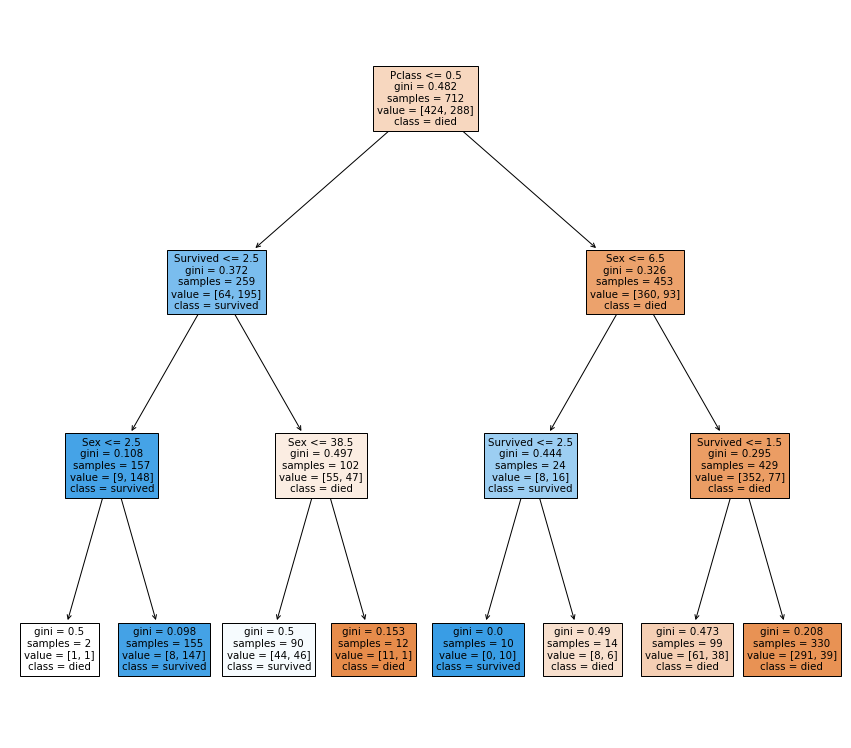

In [8]:
# train an sklearntree.decisiontreeclassifier on the entire dataset
# max_depth = 3 so the tree isnt htat tall
# then doa visualisatuionb of the tree wiuth 

from sklearn import tree




# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(titanic_data.drop(["Survived"],axis=1).values, titanic_data["Survived"])

plt.figure(figsize=(15,13.5))
tree.plot_tree(decision_tree,feature_names=titanic_data.columns, class_names={1: "survived",0:"died"},filled=True)
plt.savefig("decision_tree.png",dpi=100)


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(titanic_data.drop(["Survived"],axis=1).values, titanic_data["Survived"], random_state=0, test_size=0.25) # 25% reserved, and random state of 0

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train) # often combined into one step, using fit_transform()

print(X_train_normalized)

[[1.         1.         0.21174232 1.        ]
 [0.5        1.         0.34764882 1.        ]
 [1.         1.         0.44278337 0.        ]
 ...
 [0.5        1.         0.21174232 1.        ]
 [0.5        1.         0.52432726 1.        ]
 [1.         0.         0.32046752 0.        ]]


In [10]:
# train
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_normalized, y_train)

knn_clf = KNeighborsClassifier(n_neighbors=6, metric="euclidean")
knn_clf.fit(X_train,y_train)

y_predicted = knn_clf.predict(X_test)
print(y_predicted)
print(list(y_test)) # 80%
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
# this is the best accuracy i could get
    # with nneighbors = 6

[0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
0.7696629213483146


In [11]:
y_predicted = knn_clf.predict(X_test)
print(list(y_test)) # 80%
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

y_predicted = decision_tree.predict(X_test)
print(list(y_test)) # 80%
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

# the decision tree is more accurate

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
0.7696629213483146
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

In [13]:
pd.Series(y_predicted).to_csv("kaggle.csv")

## the decision tree is more accurate